In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, make_regression

In [11]:
# Creating a dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=20, noise=10, random_state=1)

In [12]:
# Normalization
u = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - u)/std

In [13]:
# Adding a column of 1's for vectorization
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X.shape, y.shape)

(10000, 21) (10000,)


In [14]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [15]:
def error(X, y, theta):
    y_ = hypothesis(X, theta)
    err = np.sum((y - y_)**2)
    return err/X.shape[0]

In [16]:
def gradient(X, y, theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))
    return grad/X.shape[0]

In [25]:
# Batch Gradient Descent:
def batchGradientDescent(X, y, learning_rate=0.01, max_iters=300):
    n = X.shape[1]
    theta = np.zeros((n, ))
    errorList = []
    for i in range(max_iters):
        e = error(X, y, theta)
        errorList.append(e)
        grad = gradient(X, y, theta)
        theta = theta - learning_rate*grad
    return theta, errorList

In [26]:
theta, errorList = batchGradientDescent(X, y)

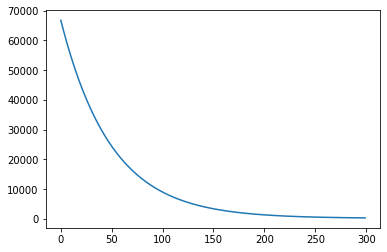

In [27]:
plt.figure()
plt.plot(np.arange(len(errorList)), errorList)
plt.show()

In [29]:
finalError = errorList[-1]
finalError

264.08329543338743

In [38]:
# if batch size = 1, then it is stochastic grad desc
def miniBatchGradDescent(X, y, batchSize=200, learning_rate=0.01, max_iters=100):
    n = X.shape[1]
    theta = np.zeros((n,))
    errorList = []
    microErrorList = []

    #shuffling to maintain randomness
    data = np.hstack((X, y.reshape(-1,1)))

    for i in range(max_iters):
        err = error(X, y, theta)
        errorList.append(err)
        np.random.shuffle(data)
        m = data.shape[0]
        totalBatches = m//batchSize
        for j in range(totalBatches):
            batchData = data[j*batchSize:(j+1)*batchSize, :]
            X_batch = batchData[:, :-1]
            y_batch = batchData[:, -1]
            e = error(X_batch, y_batch, theta)
            microErrorList.append(e)
            batchGrad = gradient(X_batch, y_batch, theta)
            theta = theta - learning_rate*batchGrad
    return theta, errorList, microErrorList    
    

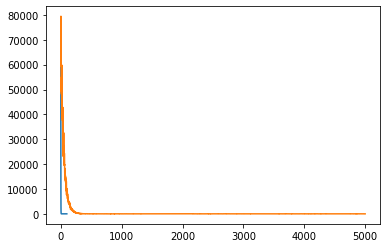

In [39]:
theta, errorList, microErrorList = miniBatchGradDescent(X, y)
plt.close()
plt.plot(np.arange(len(errorList)), errorList)
plt.show()

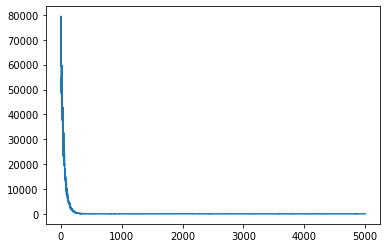

In [40]:
plt.plot(np.arange(len(microErrorList)), microErrorList)
plt.show()

In [37]:
errorList[-1]

101.46047662450813